<a href="https://colab.research.google.com/github/sbangale/Unsupervised-Learning/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science and Bussiness Analytics(GRIP MAY'21)**
# ***The Sparks Foundation***
## Task 2: Prediction using Unsupervised Learning
## Name: Sayali Bangale

## **Importing the libraries**

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## **Reading the Dataset**

---



In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.columns = iris_df.columns.str.replace(' ', '')
iris_df.head() # See the first 5 rows


,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.tail()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
iris_df.shape

(150, 4)

In [ ]:
iris_df.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.columns

Index(['sepallength(cm)', 'sepalwidth(cm)', 'petallength(cm)',
       'petalwidth(cm)'],
      dtype='object')

## **Sepal Width vs Sepal Length**

Text(0, 0.5, 'Sepal Width')

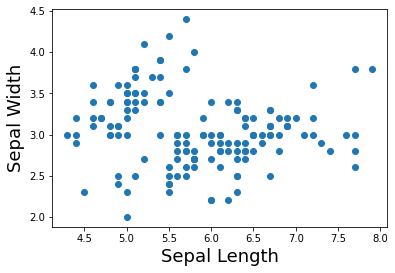

In [ ]:
plt.scatter(iris_df['sepallength(cm)'], iris_df['sepalwidth(cm)'])
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


## **Petal Length vs Petal Width**

Text(0, 0.5, 'Petal Width')

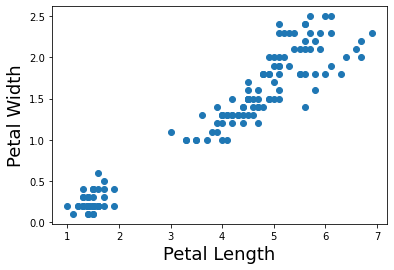

In [ ]:
plt.scatter(iris_df['petallength(cm)'], iris_df['petalwidth(cm)'])
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

## **Optimun number of Clusters**

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

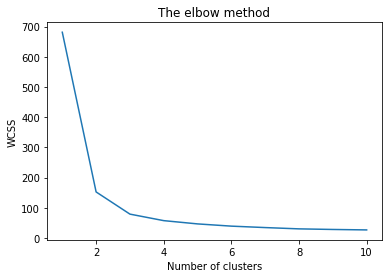

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## **Creating K-Means Classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## **Visualising the Clusters**

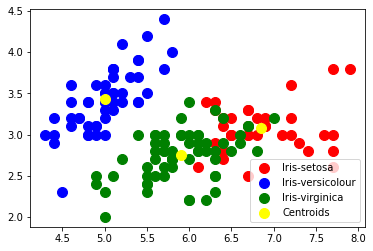

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()